# Week 2: Linear Regression from scratch

Objective: To build a univariate linear regression model that can predict profit given population size.

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

You would like to use this data to help you select which city to expand to next.

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
column_names = ["Population","Profit"]
data = pd.read_csv('ex1data1.txt', names = column_names)

In [3]:
print('data shape: {}, row size: {}, column size: {}' \
      .format(data.shape, data.shape[0], data.shape[1]))

data shape: (97, 2), row size: 97, column size: 2


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


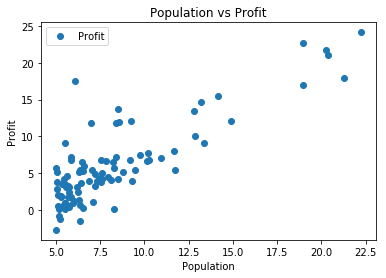

In [6]:
data.plot(x='Population', y='Profit', style='o')  
plt.title('Population vs Profit')  
plt.xlabel('Population')  
plt.ylabel('Profit')  
plt.show()

In [7]:
X = data['Population'].values.reshape(-1,1)
y = data['Profit'].values.reshape(-1,1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
print(regressor.intercept_)
print(regressor.coef_)

[-3.77728034]
[[1.16995889]]


## Y= mx + b
Where b is the intercept and m is the slope of the line.
>>>> Y = x*1.16995 - 3.77728

In [11]:
y_pred = regressor.predict(X_test)

In [12]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,13.50100,11.230952
1,5.34360,3.846055
2,13.66200,6.189131
3,-1.42110,3.662371
4,1.01730,2.656792
5,0.20421,2.292934
6,5.30480,3.669976
7,6.75260,8.242877
8,1.42330,3.631835
9,5.74420,5.927646


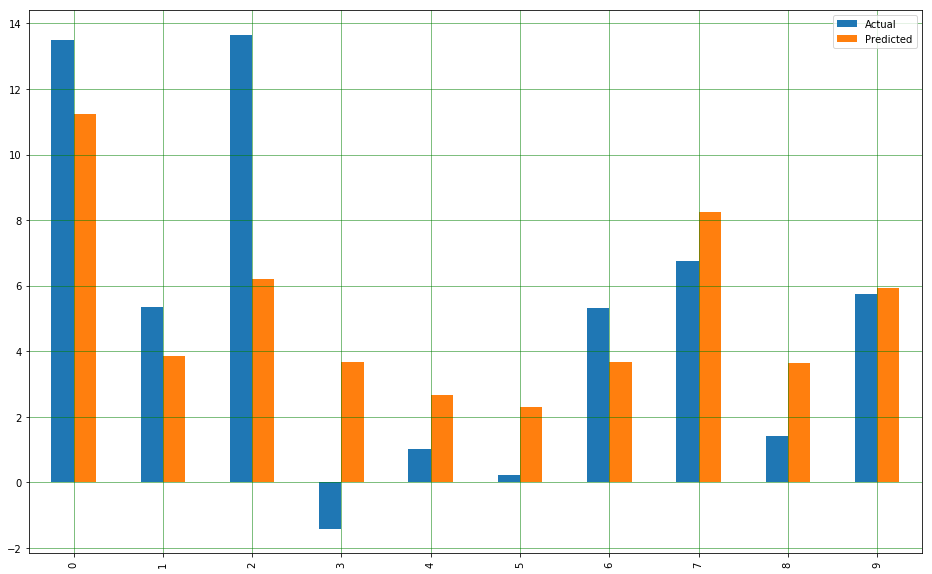

In [13]:
df1 = df.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

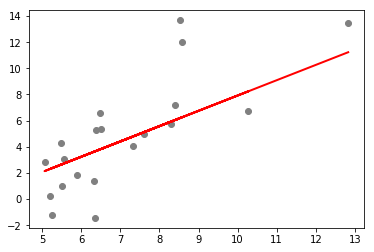

In [14]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [15]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 

Mean Squared Error: 8.316048426424132


In [20]:
def predict():
    input_ = float(input('Enter the population size(10,000): '))
    print("For a population of {}, the estimated profit is ${}".format(input_, input_ * 1.16995889))

In [21]:
predict()

Enter the population size(10,000): 20000
For a population of 20000.0, the estimated profit is $23399.177799999998
